In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
from sklearn import datasets
from sklearn.linear_model import LinearRegression
import statsmodels.graphics.regressionplots as grp

# 1 Multiple Linear Regression

In [72]:
df = pd.read_excel("stock99.xlsx")
df.head()

,Disney,MacDonalds,Schlumberger,Haliburton
0,0.08088,-0.01309,-0.08463,-0.13373
1,0.04737,0.15958,0.02884,0.03616
2,-0.04634,0.09966,0.00165,0.07919
3,0.16834,0.03125,0.09571,0.09227
4,-0.09082,0.06206,-0.05723,-0.13242


In [73]:
predictors = ['MacDonalds', 'Schlumberger', 'Haliburton']

# Add a constant to the predictors for the intercept term
X = sm.add_constant(df[predictors])

# Set Disney returns as the dependent variable
y = df['Disney']

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Disney   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                 -0.481
Method:                 Least Squares   F-statistic:                    0.5670
Date:                Mon, 13 Mar 2023   Prob (F-statistic):              0.724
Time:                        01:40:33   Log-Likelihood:                 7.3124
No. Observations:                   5   AIC:                            -6.625
Df Residuals:                       1   BIC:                            -8.187
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0938      0.098      0.956      0.514      -1.153       1.341
MacDonalds      -0.8812      1.105     -0.798      0.571     -14.915      13.153
Schlumberger     1.3151      1.988      0.662      0.628     -23.941      26.572
Haliburton      -0.1717      1.344     -0.128      0.919     -17.252      16.908
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.057
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.514
Skew:                          -0.033   Prob(JB):                        0.773
Kurtosis:                       1.430   Cond. No.                         42.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
# Calculate the standard deviation of the residuals
resid_stddev = model.resid.std()
residual_std = np.std(model.resid)

# Calculate the R-squared value
rsquared = model.rsquared

# Print the results
print(f'Standard deviation of residuals: {resid_stddev}')
print(f'R-squared value: {rsquared}')

Standard deviation of residuals: 0.06267113451677994
R-squared value: 0.6297787173251768


In [79]:
# Predict Disney returns for January through May of 1999
new_data = np.array([[0.04721, 0.03333, -0.01723], 
                     [0.05661, -0.02785, -0.03616], 
                     [0.07632, -0.00165, 0.00126], 
                     [0.02921, -0.04721, 0.01408],
                     [-0.03012, 0.04804, -0.01554]])

new_df = pd.DataFrame(new_data, columns=["MacDonalds", "Schlumberger", "Haliburton"])
new_df = sm.add_constant(new_df)
print(new_df)

# Make predictions for January through May of 1999
predictions = model.predict(new_df)

# Print the predictions
print("Predictions for January through May of 1999:")
print(predictions)

# Calculate the standard deviation of the prediction error
residuals = y - model.predict(sm.add_constant(X))
std_error = np.std(residuals)
print("Standard deviation of the prediction error:", std_error)

   const  MacDonalds  Schlumberger  Haliburton
0    1.0     0.04721       0.03333    -0.01723
1    1.0     0.05661      -0.02785    -0.03616
2    1.0     0.07632      -0.00165     0.00126
3    1.0     0.02921      -0.04721     0.01408
4    1.0    -0.03012       0.04804    -0.01554
Predictions for January through May of 1999:
0    0.099010
1    0.013522
2    0.024181
3    0.003580
4    0.186211
dtype: float64
Standard deviation of the prediction error: 0.05605476680262136


If we compare the above predicted values with the actual monthly returns on stocks of Disney for January through May 1999, we observe that the predicted returns are different for March through May 1999. <br>
This is reasonable because here we consider very small sample and the monthly returns will fluctuates seasonally. So the estimated regression fit is not a better fit to explain the monthly returns on stocks of Disney.

# 4 Regression with Collinearity

(1)

In [28]:
import numpy as np
np.random.seed(2)
x1 = np.random.uniform(low=0.0, high=1.0, size=100)
x2 = 0.5*x1 + np.random.normal(0, 1, 100)/10
y1 = 2 + 2*x1 + 0.3*x2+ np.random.normal(0, 1, 100)

The form of the linear model is<br>
y = 2 + 2x1 + 0.3x2 + ε<br>
with ε ~ N(0,1)random variable. The regression coefficients are respectively 2, 2 and 0.3.

(2)

In [29]:
corr = np.corrcoef(x1, x2)[0, 1]
print("Correlation coefficient between x1 and x2:", corr)

Correlation coefficient between x1 and x2: 0.8114574396812866


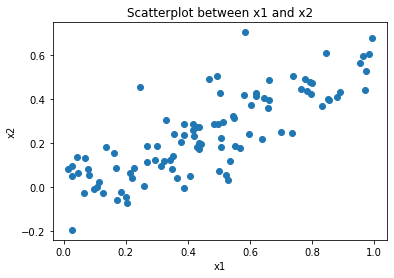

In [30]:
plt.scatter(x1,x2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatterplot between x1 and x2')
plt.show()

The variables are highly correlated

(3)

In [31]:
X1 = sm.add_constant(np.column_stack((x1, x2))) 
# add intercept column
lm_fit = sm.OLS(y1, X1).fit()

# Print summary
print(lm_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     24.47
Date:                Mon, 13 Mar 2023   Prob (F-statistic):           2.48e-09
Time:                        00:01:47   Log-Likelihood:                -137.23
No. Observations:                 100   AIC:                             280.5
Df Residuals:                      97   BIC:                             288.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7199      0.195      8.817      0.0

The coefficients β̂0, β̂1 and β̂2 are respectively 1.7199, 1.8561 and 1.1244.<br>
β̂0 and β̂1 is close to β0 and β1. As the p-value is less than 0.05 we may reject H0 for β1, however we may not reject H0 for β2 
as the p-value is higher than 0.05. Hence, we can conclude that x1 is significant, while x2 is not.

(4)

In [32]:
X2 = sm.add_constant(x1) # add intercept column
lm_fit2 = sm.OLS(y1, X2).fit()

# Print summary
print(lm_fit2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     46.98
Date:                Mon, 13 Mar 2023   Prob (F-statistic):           6.43e-10
Time:                        00:01:50   Log-Likelihood:                -138.08
No. Observations:                 100   AIC:                             280.2
Df Residuals:                      98   BIC:                             285.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6908      0.194      8.698      0.0

The coefficient for “x1” in this last model is very different from the one with “x1” and “x2” as predictors. In this case “x1” is highly significant as its p-value is very low, so we may reject H0.

(5)

In [33]:
X3 = sm.add_constant(x2) # add intercept column
lm_fit3 = sm.OLS(y1, X3).fit()

# Print summary
print(lm_fit3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     37.12
Date:                Mon, 13 Mar 2023   Prob (F-statistic):           2.18e-08
Time:                        00:01:52   Log-Likelihood:                -141.60
No. Observations:                 100   AIC:                             287.2
Df Residuals:                      98   BIC:                             292.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0661      0.163     12.702      0.0

The coefficient for “x2” in this last model is very different from the one with “x1” and “x2” as predictors. In this case “x2” is highly significant as its p-value is very low, so we may again reject H0.

(6)<br>
No, the results do not contradict each other. As the predictors “x1” and “x2” are highly correlated we are in the presence of collinearity, in this case it can be difficult to determine how each predictor separately is associated with the response. Since collinearity reduces the accuracy of the estimates of the regression coefficients, it causes the standard error for β̂1
 to grow (we have a standard error of 0.624 and 0.874 for “x1” and “x2” respectively in the model with two predictors and only of 0.366 and 0.531 for “x1” and “x2” respectively in the models with only one predictor). Consequently, we may fail to reject H0 in the presence of collinearity. The importance of the “x2” variable has been masked due to the presence of collinearity.

(7)

In [34]:
x1 = np.append(x1 ,0.1)
x2 = np.append(x2 ,0.8)
y1 = np.append(y1,6)

In [35]:
X4 = sm.add_constant(np.column_stack((x1, x2))) # add intercept column
lm_fit4 = sm.OLS(y1, X4).fit()

print(lm_fit4.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     24.56
Date:                Mon, 13 Mar 2023   Prob (F-statistic):           2.26e-09
Time:                        00:01:57   Log-Likelihood:                -141.72
No. Observations:                 101   AIC:                             289.4
Df Residuals:                      98   BIC:                             297.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8250      0.197      9.262      0.0

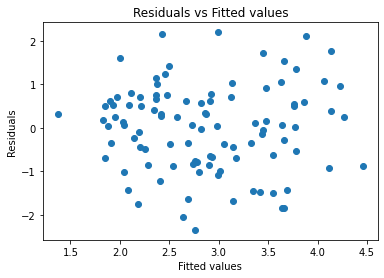

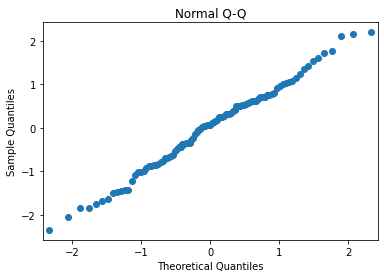

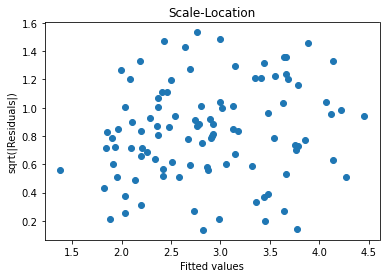

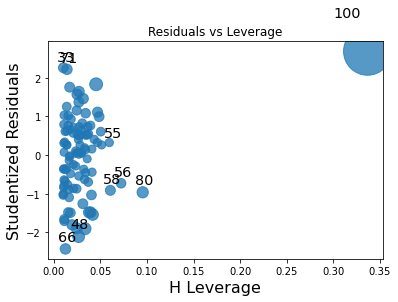

In [65]:
# Residual vs Fitted plot
fig, ax = plt.subplots()
ax.scatter(lm_fit4.fittedvalues, lm_fit4.resid)
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residuals')
ax.set_title('Residuals vs Fitted values')

# Normal Q-Q plot
fig, ax = plt.subplots()
sm.qqplot(lm_fit4.resid, ax=ax)
ax.set_title('Normal Q-Q')

# Scale-Location plot
fig, ax = plt.subplots()
ax.scatter(lm_fit4.fittedvalues, np.sqrt(np.abs(lm_fit4.resid)))
ax.set_xlabel('Fitted values')
ax.set_ylabel('sqrt(|Residuals|)')
ax.set_title('Scale-Location')

# Residual vs Leverage plot
fig, ax = plt.subplots()
sm.graphics.influence_plot(lm_fit4, ax=ax)
ax.set_title('Residuals vs Leverage')
plt.show()

In [37]:
X5 = sm.add_constant(x1) # add intercept column
lm_fit5 = sm.OLS(y1, X5).fit()

print(lm_fit5.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     34.85
Date:                Mon, 13 Mar 2023   Prob (F-statistic):           5.01e-08
Time:                        00:02:14   Log-Likelihood:                -147.01
No. Observations:                 101   AIC:                             298.0
Df Residuals:                      99   BIC:                             303.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8228      0.207      8.824      0.0

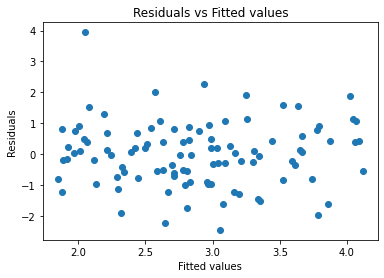

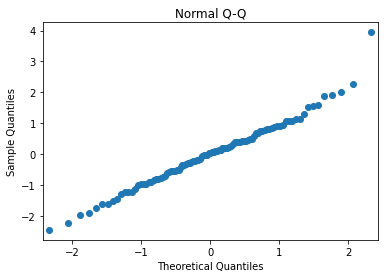

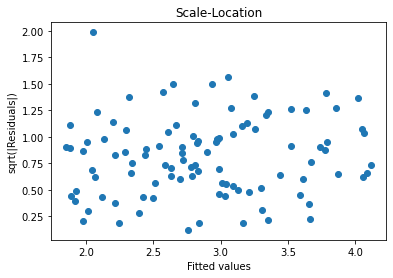

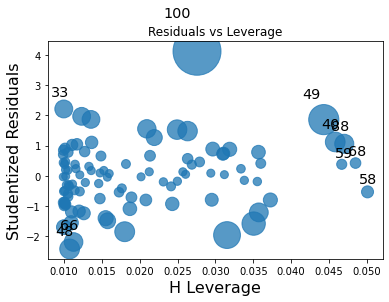

In [66]:
# Residual vs Fitted plot
fig, ax = plt.subplots()
ax.scatter(lm_fit5.fittedvalues, lm_fit5.resid)
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residuals')
ax.set_title('Residuals vs Fitted values')

# Normal Q-Q plot
fig, ax = plt.subplots()
sm.qqplot(lm_fit5.resid, ax=ax)
ax.set_title('Normal Q-Q')

# Scale-Location plot
fig, ax = plt.subplots()
ax.scatter(lm_fit5.fittedvalues, np.sqrt(np.abs(lm_fit5.resid)))
ax.set_xlabel('Fitted values')
ax.set_ylabel('sqrt(|Residuals|)')
ax.set_title('Scale-Location')

# Residual vs Leverage plot
fig, ax = plt.subplots()
sm.graphics.influence_plot(lm_fit5, ax=ax)
ax.set_title('Residuals vs Leverage')
plt.show()

In [69]:
X6 = sm.add_constant(x2) # add intercept column
lm_fit6 = sm.OLS(y1, X6).fit()

print(lm_fit6.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     44.93
Date:                Mon, 13 Mar 2023   Prob (F-statistic):           1.27e-09
Time:                        01:14:28   Log-Likelihood:                -143.35
No. Observations:                 101   AIC:                             290.7
Df Residuals:                      99   BIC:                             295.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0325      0.161     12.622      0.0

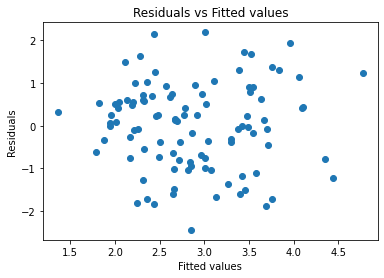

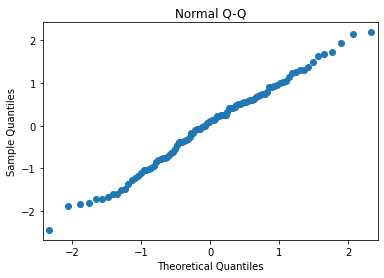

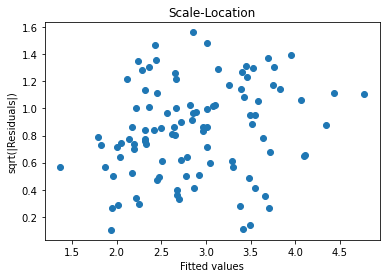

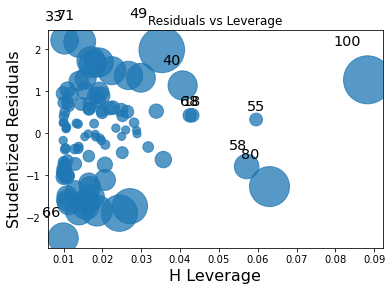

In [68]:
# Residual vs Fitted plot
fig, ax = plt.subplots()
ax.scatter(lm_fit6.fittedvalues, lm_fit6.resid)
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residuals')
ax.set_title('Residuals vs Fitted values')

# Normal Q-Q plot
fig, ax = plt.subplots()
sm.qqplot(lm_fit6.resid, ax=ax)
ax.set_title('Normal Q-Q')

# Scale-Location plot
fig, ax = plt.subplots()
ax.scatter(lm_fit6.fittedvalues, np.sqrt(np.abs(lm_fit6.resid)))
ax.set_xlabel('Fitted values')
ax.set_ylabel('sqrt(|Residuals|)')
ax.set_title('Scale-Location')

# Residual vs Leverage plot
fig, ax = plt.subplots()
sm.graphics.influence_plot(lm_fit6, ax=ax)
ax.set_title('Residuals vs Leverage')
plt.show()

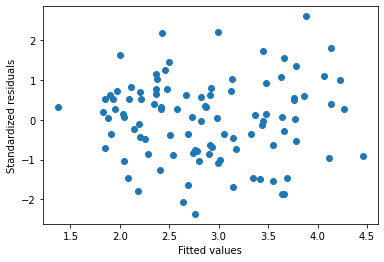

In [129]:
plt.scatter(lm_fit4.predict(), lm_fit4.get_influence().resid_studentized_internal)
plt.xlabel('Fitted values')
plt.ylabel('Standardized residuals')
plt.show()

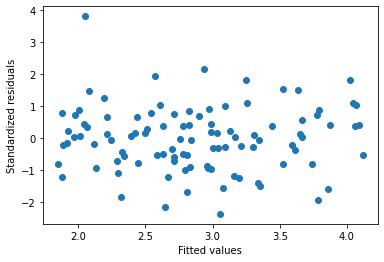

In [130]:
plt.scatter(lm_fit5.predict(), lm_fit5.get_influence().resid_studentized_internal)
plt.xlabel('Fitted values')
plt.ylabel('Standardized residuals')
plt.show()

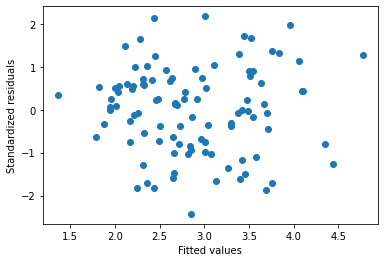

In [131]:
plt.scatter(lm_fit6.predict(), lm_fit6.get_influence().resid_studentized_internal)
plt.xlabel('Fitted values')
plt.ylabel('Standardized residuals')
plt.show()

In the first model (x1 & x2) and third model (x2 only), the last point is not an outlier. In the second model (x1 only) the last point is an outlier, the point is outside |3| value cutoff.

In the first model,<br>
The R-squared values is slightly greater but not enough to be a significant improvement.<br>
The x2 variable is now the predictor that is statistically significant instead of x1. This was the opposite for the previous model.<br>
<br>
For this model, using cook’s distance as a reference, the new point is a leverage point but not an outlier.
<br>
<br>
In the second model,<br>
In both cases, x1 is statistically significant to the variations in y. However, we observe a sizeable negative change is the R-squared value. Hence, this model is worse than the former.<br>
<br>
For this model, the added data point is a relative outlier. It is not an absolute outlier in the sense that the magnitude of its separation from the “normal” range is quite small.<br>
<br>
<br>
In the third model,<br>
In both cases, x2 is statistically significant to the variations in y. However, we observe a sizeable positive change is the R-squared value. Hence, this model is better than the former.<br>
<br>
For this model, using cook’s distance as a reference, the added data point is not an outlier or leverage point.<br>
To conclude, in the first model, x1 is not statistically significant, but in the second model it is. x2 is statistically significant in both the first and the third model.<br>
<br>
In the first model, x1 is not statistically significant, but in the second model it is. x2 is statistically significant in both the first and the third model.